Rain Prediction in Australia - v3.1

### 1- Problem?

I will try to answer the question of whether or not it will rain tomorrow in Australia. 

To answer the question, I build a classifier to predict whether or not it will rain tomorrow in Australia. 
I used a binary classification model using Logistic Regression.
I have used the Rain in Australia dataset for this project.

Implementation of Rain Prediction in Australia by Logistic Regression with Python and Scikit-Learn.

### 2- Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

### 3- Import dataset

In [3]:
rain = 'E:/AMotefaker/ABC/Data Science/IBM Data Science Professional Certificate/9-Machine Learning with Python/Project/Rain Prediction in Australia - v3/weatherAUS_states.csv'

df = pd.read_csv(rain)

### 4- Exploratory data analysis

#### Dimensions of dataset

In [4]:
df.shape

(145460, 24)

We can see that there are 145460 instances and 24 variables in the data set.

#### Preview the dataset 

In [5]:
df.head()

,Date,Location,State,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,New_South_Wales,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,New_South_Wales,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,New_South_Wales,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,New_South_Wales,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,New_South_Wales,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### View column names

In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'State', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### View summary of dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   State          145460 non-null  object 
 3   MinTemp        143975 non-null  float64
 4   MaxTemp        144199 non-null  float64
 5   Rainfall       142199 non-null  float64
 6   Evaporation    82670 non-null   float64
 7   Sunshine       75625 non-null   float64
 8   WindGustDir    135134 non-null  object 
 9   WindGustSpeed  135197 non-null  float64
 10  WindDir9am     134894 non-null  object 
 11  WindDir3pm     141232 non-null  object 
 12  WindSpeed9am   143693 non-null  float64
 13  WindSpeed3pm   142398 non-null  float64
 14  Humidity9am    142806 non-null  float64
 15  Humidity3pm    140953 non-null  float64
 16  Pressure9am    130395 non-null  float64
 17  Pressure3pm    130432 non-nul

##### Tips:

We can see that the dataset contains a mixture of categorical and numerical variables.

Categorical variables have data-type object.

Numerical variables have data type float64.

There are some missing values in the dataset. We will explore it later.

#### View statistical properties of dataset

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


##### Important points:
The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

If we want to view the statistical properties of character variables, we should run the following command:

     df.describe(include=['object'])

If we want to view the statistical properties of all the variables, we should run the following command:

     df.describe(include='all')

###  5- Univariate Analysis 

#### Explore "RainTomorrow"  target variable

##### Check for missing values

In [9]:
df['RainTomorrow'].isnull().sum()

3267

We can see that there are 3267 missing values in the Rain Tomorrow target variable.

##### View number of unique values

In [10]:
df['RainTomorrow'].nunique()

2

We can see that the number of unique values in RainTomorrow variable is 2.

##### View the unique values

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

The three unique values are No,Yes and nan.

##### View the frequency distribution of values

In [12]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

##### View percentage of frequency distribution of values

In [13]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

##### Tips:

We can see that out of the total number of RainTomorrow values, No appears 75.84% times and Yes appears 21.91% times.

##### Visualize frequency distribution of RainTomorrow variable

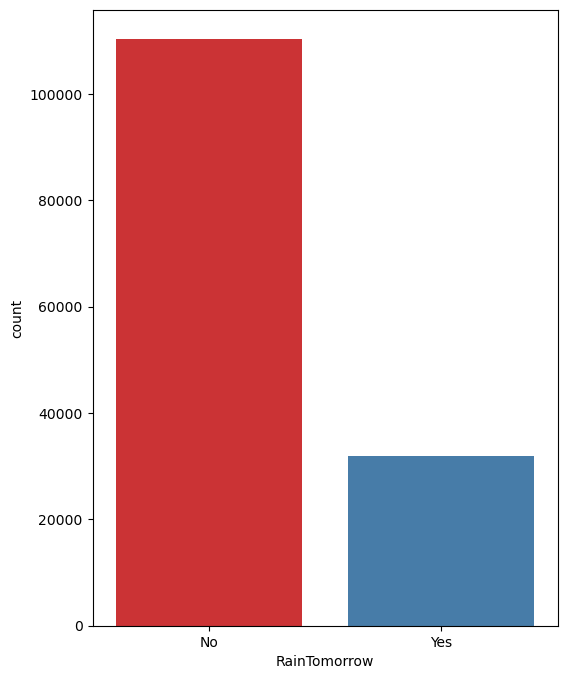

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Tips:
    The above univariate plot confirms our findings that:
        The No variable have 110316 entries
        The Yes variable have 31877 entries.

##### Plot the bars horizontally

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Findings of Univariate Analysis:
    The number of missing values in RainTomorrow variable is 3267.
    The number of unique values in RainTomorrow variable is 2.
    The three unique values are No,Yes and nan.
    The total number of RainTomorrow values, No appears 75.84% times and Yes appears 21.91% times.
    The univariate plot confirms our findings that:
        The No variable have 110316 entries
        The Yes variable have 31877 entries    

### 6- Bivariate Analysis 

###### Types of variables:
    I segregate the dataset into categorical and numerical variables. 
    There is a mixture of categorical and numerical variables in the dataset.

    Categorical variables have a data-type object.
    Numerical variables have data type float64.

##### Explore Categorical Variables 

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

In [ ]:
 # view the categorical variables

df[categorical].head()

##### Summary of categorical variables:
    - There is a date variable. It is denoted by Date column.
    - There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and    RainTomorrow.
    - There are two binary categorical variables - RainToday and RainTomorrow.
    - RainTomorrow is the target variable.

#### Explore problems within categorical variables 

##### Missing values in categorical variables

In [ ]:
# check missing values in categorical variables

df[categorical].isnull().sum()

In [ ]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

We can see that there are only 5 categorical variables in the dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

##### Frequency count of categorical variables

In [ ]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

In [ ]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

##### Number of labels: Cardinality
- The number of labels within a categorical variable is known as cardinality.
- A high number of labels within a variable is known as high cardinality. 
- High cardinality may pose some serious problems in the machine learning model. 
- So, I will checked for high cardinality.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

We can see that there is a Date variable which contains  3436  labels, which needs to be preprocessed. 
All the other variables contain relatively smaller number of variables.

#### Feature Engineering of Date Variable

In [ ]:
df['Date'].dtypes

We can see that the data type of the Date variable is an object. I will parse the date currently coded as an object into DateTime format.

In [ ]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

In [ ]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

In [ ]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

In [ ]:
# again view the summary of dataset

df.info()

We can see that there are three additional columns created from the Date variable. Now, I will drop the original Date variable from the dataset.

In [ ]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [ ]:
# preview the dataset again

df.head()

Now, we can see that the Date variable has been removed from the dataset.

#### Explore Categorical Variables one by one

Now, I will explore the categorical variables one by one.

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

- We can see that there are 6 categorical variables in the dataset.
- The Date variable has been removed. 
- First, I will check missing values in categorical variables.

In [ ]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

- We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow variables contain missing values. 
- I will explore these variables one by one.

#### Explore "Location" variable

In [ ]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

In [ ]:
# check labels in location variable

df.Location.unique()

In [ ]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

In [ ]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

#### Explore "WindGustDir" variable

In [ ]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

In [ ]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

In [ ]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

In [ ]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

We can see that there are 10326 missing values in WindGustDir variable.

#### Explore "WindDir9am" variable

In [ ]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

In [ ]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

In [ ]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

In [ ]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

We can see that there are 10566 missing values in the `WindDir9am` variable.

#### Explore "WindDir3pm" variable

In [ ]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

In [ ]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

In [ ]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

In [ ]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

There are 4228 missing values in the `WindDir3pm` variable.

#### Explore "RainToday" variable

In [ ]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

In [ ]:
# check labels in WindGustDir variable

df['RainToday'].unique()

In [ ]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

In [ ]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

There are 3261 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

In [ ]:
# view the numerical variables

df[numerical].head()

#### Summary of numerical variables 
- There are 16 numerical variables.
- These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
- All of the numerical variables are of continuous type.

#### Explore problems within numerical variables 
##### In the following, I will explore the numerical variables.

### Missing values in numerical variables

In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [ ]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

On closer inspection, we can see that the Rainfall, Evaporation, Wind Speed 9am and Wind Speed 3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables
- Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

- If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use "interquantile range" to find outliers.

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

For "Rainfall", the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [ ]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

For "Evaporation", the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [ ]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

For "WindSpeed9am", the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [ ]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

For "WindSpeed3pm", the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

### 7- Multivariate Analysis
- An important step in EDA is to discover patterns and relationships between variables in the dataset.

- I will use "heat map" and "pair plot" to discover the patterns and relationships in the dataset.

- First of all, I will draw a heat map.

In [ ]:
correlation = df.corr()

#### Heat Map 

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Tips:
From the above correlation heat map, we can conclude that:

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).
- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).
- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).
- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).
- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).
- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).
- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).
- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

#### Pair Plot 
- First of all, I will define extract the variables which are highly positively correlated. 

In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

Now, I will draw pairplot to depict relationship between these variables.

In [ ]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### Tips:
- I have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

- The above pair plot shows relationship between these variables.

### 8- Declare feature vector and target variable 

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

### 9- Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

### 10- Feature Engineering 
- Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.
- I will carry out feature engineering on different types of variables.

- First, I will display the categorical and numerical variables again separately.

In [ ]:
# check data types in X_train

X_train.dtypes

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

#### Engineering missing values in numerical variables 

In [ ]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

In [ ]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

#### Assumption,
- I assume that the data are missing completely at random (MCAR).

- There are two methods that can be used to impute missing values:

- One is mean or median imputation and another one is random sample imputation.

- When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

- I will impute missing values with the appropriate statistical measures of the data, in this case, median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill in missing values both in the train and test set should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

In [ ]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Now, we can see that there are no missing values in the numerical columns of the training and test set.

#### Engineering missing values in categorical variables

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

As a final check, I will check for missing values in X_train and X_test.

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

We can see that there are no missing values in X_train and X_test.

#### Engineering outliers in numerical variables 
- We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.

- We will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

In [ ]:
X_train[numerical].describe()

We can now see that the outliers in Rainfall, Evaporation, Wind Speed 9am and Wind Speed 3pm columns are capped.

#### Encode categorical variables

In [ ]:
# print categorical variables

categorical

In [ ]:
X_train[categorical].head()

In [ ]:
# pip install category_encoders
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

##### Now, I will create the X_train training set.

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

##### Similarly, I will create the X_test testing set.

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

- We now have training and testing set ready for model building. 
- Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

### 11- Feature Scaling

In [ ]:
X_train.describe()

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

We now have X_train dataset ready to be fed into the Logistic Regression classifier.

### 12 - Model training

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)